In [2]:
import pandas as pd
import numpy as np
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as sts
import scikit_posthocs as sp
import statsmodels.stats as stm
from statsmodels.graphics.gofplots import qqplot

In [7]:
df = pd.read_csv('EFIplus_medit.zip',compression='zip', sep=";")

5.1 
Test if the frequency of sites with presence and absence of Salmo trutta fario (Brown Trout) are 
independent from the country. Please state which is/are the null hypothesis of your test(s)

In [5]:
cdf = pd.crosstab(index=df['Country'], columns=df['Salmo trutta fario'])
print(cdf)

stat, p, df, expected = sts.chi2_contingency(cdf)
print('df=%d' % df)
print('expected values:')
print(expected)

prob=0.95
critical = sts.chi2.ppf(prob, df)
print('critical=%.3f, stat=%.3f' % (critical, stat))
if abs(stat) >= critical:
 print('reject H0 that variables are independent')
else:
 print('fail to reject H0 that variables are independent')

alpha = 0.05
print('significance=%.2f, p=%.3f' % (alpha, p))
if p <= alpha:
 print('reject H0 that variables are independent')
else:
 print('fail to reject H0 that variables are independent')

Salmo trutta fario     0     1
Country                       
France                13    59
Italy                109    76
Portugal             615   252
Spain               1239  2648
df=3
expected values:
[[  28.39193774   43.60806226]
 [  72.95150669  112.04849331]
 [ 341.88625025  525.11374975]
 [1532.77030533 2354.22969467]]
critical=7.815, stat=496.372
reject H0 that variables are independent
significance=0.05, p=0.000
reject H0 that variables are independent


5.2 Test whether the means (or medians) of “Actual_river_slope” between presence and absence sites of Salmo trutta fario (Brown Trout) are equal using an appropriate test. Please state which is/are the null hypothesis of your test(s)

In [9]:
df2 = df.dropna()

sample1 = df2[df2['Salmo trutta fario']==0]['Actual_river_slope']
sample2 = df2[df2['Salmo trutta fario']==1]['Actual_river_slope']

Meds1 = sample1.median()
Meds2 = sample2.median()

stat, p = sts.mannwhitneyu(sample1, sample2, alternative='two-sided')
print('stat=%.3f, p-value=%.3f' % (stat, p))
alpha = 0.05
if p <= alpha:
 print('reject H0 that median values are equal')
else:
 print('fail to reject H0')

print('Median of sample 1 = %.2f' % Meds1)
print('Median of sample 2 = %.2f' % Meds2)

stat=439968.000, p-value=0.000
reject H0 that median values are equal
Median of sample 1 = 4.05
Median of sample 2 = 10.70


5.3 Test whether there are diferences in the mean elevation in the upstream catchment (ELEV_MN_du) among the four most sampled catchments. For which pairs of catchments are these diferences significant? Please state which is/are the null hypothesis of your test(s).

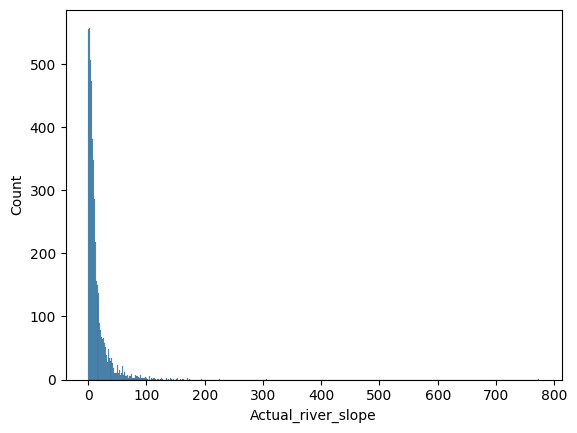

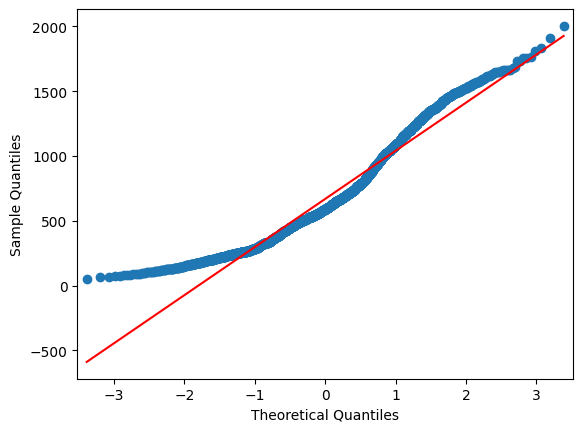

                      sum_sq      df           F         PR(>F)
Catchment_name  9.529782e+07     3.0  335.908533  4.099458e-171
Residual        1.601023e+08  1693.0         NaN            NaN
reject H0 that mean elevation values are equal among catchments
         Multiple Comparison of Means - Tukey HSD, FWER=0.05         
   group1       group2     meandiff p-adj    lower     upper   reject
---------------------------------------------------------------------
        Ebro Galiza-Norte -518.8618    0.0  -624.422 -413.3017   True
        Ebro        Minho  -41.8011 0.7388 -147.3794   63.7771  False
        Ebro         Tejo -501.9569    0.0 -615.5935 -388.3203   True
Galiza-Norte        Minho  477.0607    0.0  434.8052  519.3162   True
Galiza-Norte         Tejo   16.9049 0.8853   -42.694   76.5038  False
       Minho         Tejo -460.1558    0.0 -519.7868 -400.5248   True
---------------------------------------------------------------------
F-statistics=649.402, p=0.000000
reject H0 t

,1,2,3,4
1,1.000000e+00,2.995737e-28,2.995737e-28,7.898965e-29
2,2.995737e-28,1.000000e+00,1.000000e+00,4.914935e-01
3,2.995737e-28,1.000000e+00,1.000000e+00,4.914935e-01
4,7.898965e-29,4.914935e-01,4.914935e-01,1.000000e+00


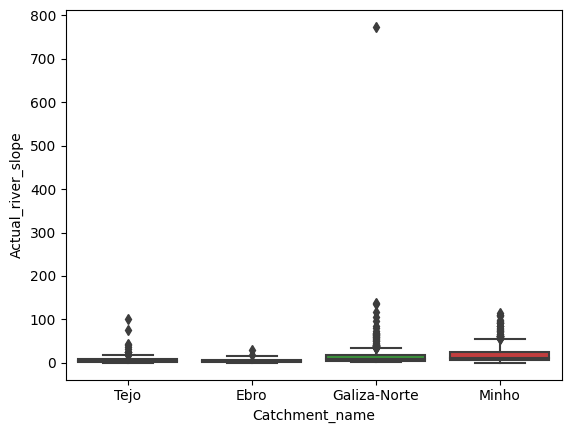

In [10]:
catchment_count = pd.crosstab(index = df['Catchment_name'], columns='count')
catchment_count.sort_values(by=['count'], ascending=False)

import statsmodels.api as sm
from statsmodels.formula.api import ols

dfsub = df2[(df2['Catchment_name']=='Ebro') | 
    (df2['Catchment_name']=='Galiza-Norte') |
    (df2['Catchment_name']=='Minho') |
    (df2['Catchment_name']=='Tejo')
]

sns.histplot(df['Actual_river_slope'])

from statsmodels.graphics.gofplots import qqplot

qqplot(pd.Series(df2['Elevation_mean_catch']), line='s')
plt.show()


mod = ols('Elevation_mean_catch ~ Catchment_name',
                data=dfsub).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print(aov_table)

alpha=0.05
p=aov_table['PR(>F)'][0]

if p <= alpha:
 print('reject H0 that mean elevation values are equal among catchments')
else:
 print('fail to reject H0 that mean elevation values are equal among catchments')

dfsub[['Elevation_mean_catch','Catchment_name']].groupby('Catchment_name').mean()

tukey = stm.multicomp.pairwise_tukeyhsd(endog=dfsub['Elevation_mean_catch'],
                          groups=dfsub['Catchment_name'],
                          alpha=0.05)
print(tukey)

sns.boxplot(data=dfsub, x='Catchment_name', y='Actual_river_slope')

sample1 = df2[(df2['Catchment_name']=='Ebro')]['Elevation_mean_catch']
sample2 = df2[(df2['Catchment_name']=='Galiza-Norte')]['Elevation_mean_catch']
sample3 = df2[(df2['Catchment_name']=='Minho')]['Elevation_mean_catch']
sample4 = df2[(df2['Catchment_name']=='Tejo')]['Elevation_mean_catch']

stat, p = sts.kruskal(sample1, sample2, sample3, sample4)
print('F-statistics=%.3f, p=%.6f' % (stat, p))

alpha=0.05

if p <= alpha:
 print('reject H0 that median elevation values are equal among catchments')
else:
 print('fail to reject H0 that median elevation values are equal among catchments')

dfsub[['Elevation_mean_catch','Catchment_name']].groupby('Catchment_name').median()

list_sample = [sample1, sample2, sample2, sample4]
sp.posthoc_dunn(list_sample, p_adjust = 'bonferroni')


5.4 Which potential problems do you think there are in the data that could limit the conclusions derived from the performed tests?

Resposta da correção: Potential problems in the data used for hypothesis testing is that categories are highly unbalanced (very different number of samples for each category - see below). Another potential problem is the lak of independency among sampling sites. For example when we tested the effect of Actual_river_slope in the presence of Salmo trutta fario, we did not take into account that observations within each catchment might not be totally independent.

In [11]:
print(dfsub['Catchment_name'].value_counts())
print(df['Salmo trutta fario'].value_counts())

Galiza-Norte    702
Minho           699
Tejo            235
Ebro             61
Name: Catchment_name, dtype: int64
1    3035
0    1976
Name: Salmo trutta fario, dtype: int64
